In [1]:
%autosave 300

Autosaving every 300 seconds


In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [21]:
!pwd

/home001/yousung.choi/projects/project_coordination


In [22]:
file_path = "/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/"
file_name = None
for file in os.listdir(file_path):
#     if file.startswith('2_'):
    if file.startswith('3_'):
#     if file.startswith('9013'):
        print(file)
        file_name = file



3_setting_sound.mp4


In [23]:
video_file = os.path.join(file_path, file_name)
print(video_file)

/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/3_setting_sound.mp4


total frames : 620.0
620


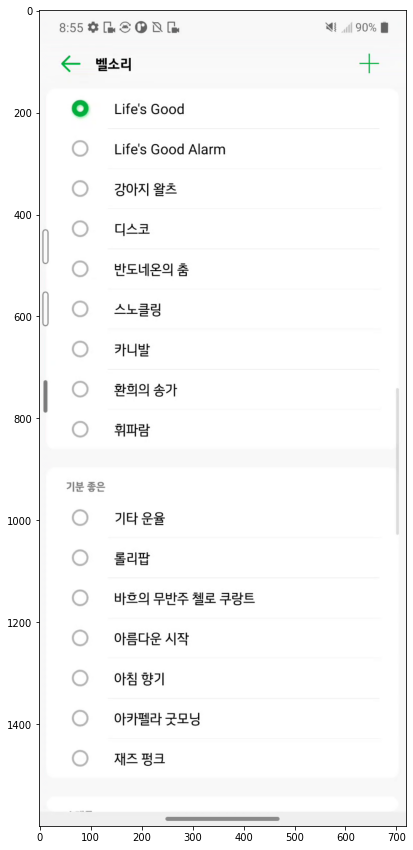

In [24]:


cap = cv2.VideoCapture(video_file)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

images = []

plt.rcParams['figure.figsize'] = [15, 15]
while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret:
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        images.append(image)
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 250:
            plt.imshow(image)
    # if not vaild frame (EOF)
    else:
        break
        
cap.release()

print(len(images))

#### 1) Try ORB to get orb features of the image
     -> 결과 : 특징점을 잡아낼 만한 커서의 사이즈가 너무 작아서 쉽지 않아 보인다.
     
#### 2) Try Optical flow which I can use it
#### 3) mix them together (ORB as feature extractor, Optical flow(LK) as tracking)

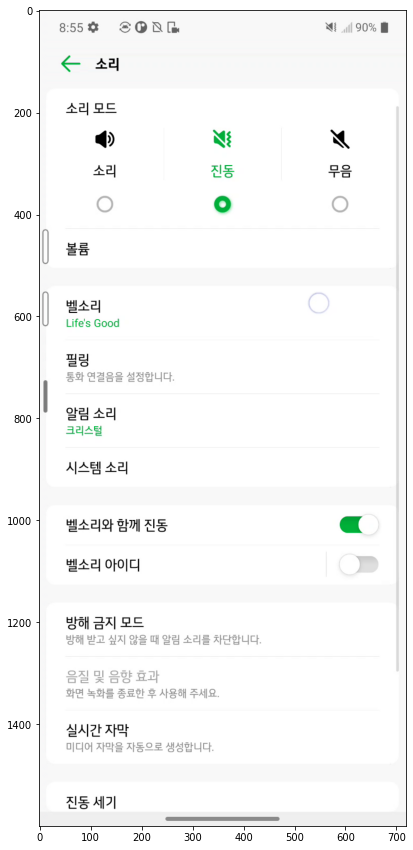

In [7]:
plt.imshow(images[206])

In [6]:
import random

rand_idx = random.randint(0, len(images))
print(rand_idx)

224


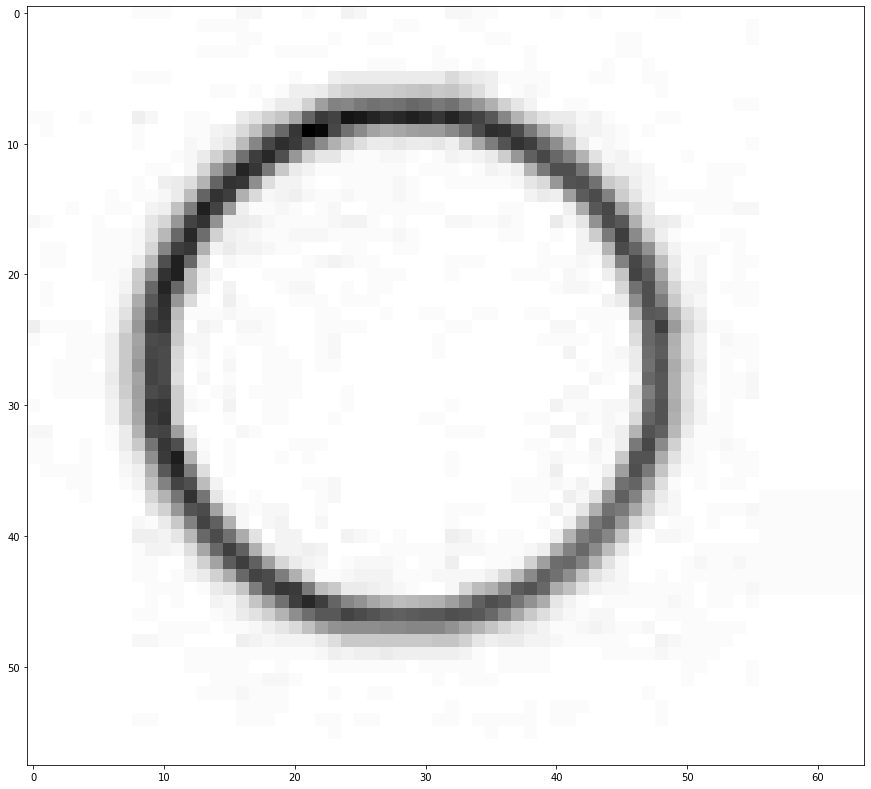

In [8]:
src = images[206]
# gray = src
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

target_img = "/home001/yousung.choi/projects/project_coordination/tools/optical_flow_test/images/Cursor_image_original3.jpg"
# target = cv2.imread(target_img, cv2.IMREAD_COLOR)
target = cv2.imread(target_img, cv2.IMREAD_GRAYSCALE)

# plt.imshow(target)
# plt.imshow(gray, 'gray')
plt.imshow(target, 'gray')


In [192]:
orb1 = cv2.ORB_create(
    nfeatures=40000
)
orb2 = cv2.ORB_create(
    nfeatures=40000,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=2,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=2,
    fastThreshold=20,
)

In [193]:
kp1, des1 = orb1.detectAndCompute(gray, None)
kp2, des2 = orb1.detectAndCompute(target, None)

kp3, des3 = orb2.detectAndCompute(gray, None)
kp4, des4 = orb2.detectAndCompute(target, None)

print(len(kp1), len(kp2), len(kp3), len(kp4))

9075 0 6090 5


In [54]:
print(kp4)
print(des4)

[<KeyPoint 0x7fcd7d214cc0>, <KeyPoint 0x7fcd7d214cf0>, <KeyPoint 0x7fcd7d214d20>, <KeyPoint 0x7fcd7d214d50>, <KeyPoint 0x7fcd7d214d80>]
[[193   0  10  26  30   9 209  25 234 196 193  86 212  13 144  33  30 241
  133  56 136  72 148  84 144  37 163  24   2 145  33  67]
 [138 128  66  22 134  24  25  16 228   0  66  90 172 133  16 100  14  81
    5   8 205  16  17   0   8 129  57  53   0  24  97  75]
 [  8   8  12   7 131  13  81  28 226 106  66  70 248 133  40 209 142  81
  245  60 108  80 214   0  65 132  42  54   2  25  39  65]
 [  0   8  12  13 131  12  81  28 113 106  66  68 208 133  40 208 158  17
  245  60 108   0  86   0  65 128  42  54   2   9  39   0]
 [178 193  80 140 160  64  12  64  17 145  17  48   2  48  64  66  80   0
    8  64 129   3   9  68   0  65  17  64 124   4  16 154]]


In [197]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [198]:
matches = bf.match(des3, des4)
matches = sorted(matches, key=lambda x: x.distance)

In [194]:

bf = cv2.BFMatcher(cv2.NORM_HAMMING2)

matches = bf.knnMatch(des3, des4, 2)
ratio = 0.75
matches = [first for first,second in matches \
                    if first.distance < second.distance * ratio]

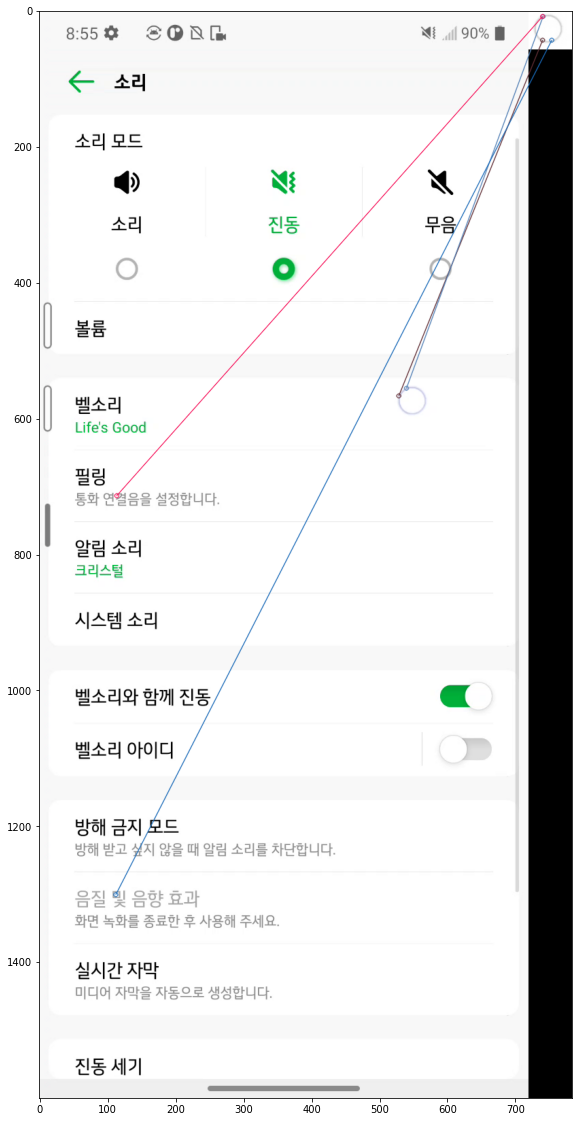

In [199]:
new_img = cv2.drawMatches(src, kp3, target, kp4, matches[:10], None, flags=2)
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(new_img)

#### 그렇다면, 이미지의 특정 위치만 Feature Mapping 으로 쫒아가볼 수 있을까 ? 예를들어, 터치 위치를 안다고 가정하고
#### next frame 에서 이와 비슷한 위치를 찾아내기만 한다면...??

In [68]:
file_path = "/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/"
file_name = None
for file in os.listdir(file_path):
    if file.startswith('3_'):
#     if file.startswith('9013'):
        print(file)
        file_name = file
        
video_file = os.path.join(file_path, file_name)
print(video_file)

cap = cv2.VideoCapture(video_file)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

images = []

plt.rcParams['figure.figsize'] = [15, 15]
while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret:
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        images.append(image)
    # if not vaild frame (EOF)
    else:
        break
        
cap.release()

print(len(images))


3_setting_sound.mp4
/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/3_setting_sound.mp4
total frames : 620.0
620


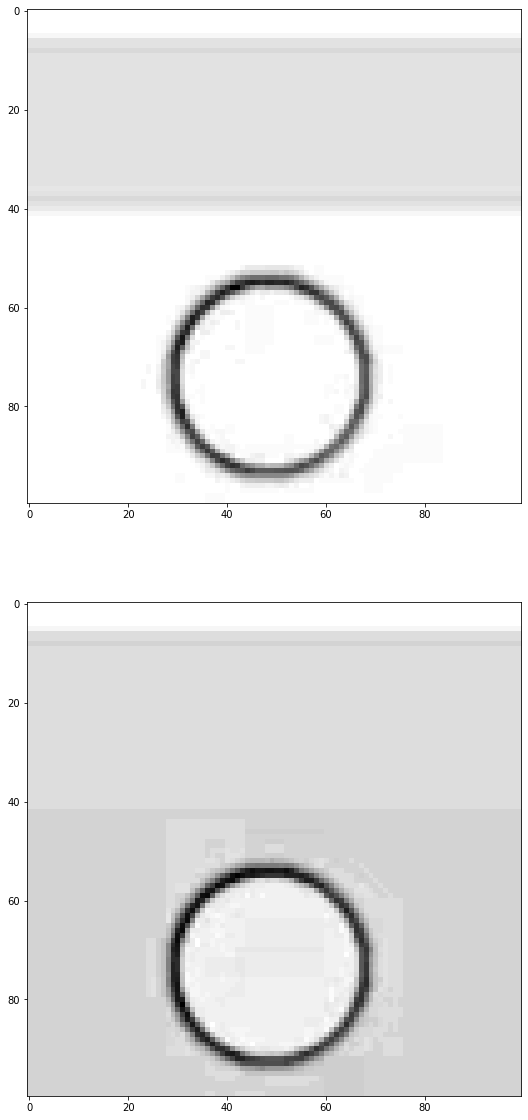

In [145]:
fig = plt.figure()
rows = 2
cols = 1

prev_img = images[206][500:600,500:600,:]
next_img = images[209][500:600,500:600,:]

prev_gray = cv2.cvtColor(prev_img, cv2.COLOR_RGB2GRAY)
next_gray = cv2.cvtColor(next_img, cv2.COLOR_RGB2GRAY)

show_images = [prev_gray, next_gray]
for i, image in enumerate(show_images):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(image, 'gray')

# print(images[206].shape)
# plt.imshow(images[206][500:600,500:600,:])


In [146]:
orb3 = cv2.ORB_create(
    nfeatures=100,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=5,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=2,
    fastThreshold=20,
)

In [147]:

kp_prev, desc_prev = orb3.detectAndCompute(prev_gray, None)
kp_next, desc_next = orb3.detectAndCompute(next_gray, None)

print(desc_prev, '\n', desc_next)


[[243 193  90 134 152   8  24  88 241  80 146  18  22 132  16  99   2 209
   12  16 141  65  17   0  16 101 187  52  78 145  49 219]
 [227 194  72 142 152   8  24  92 113 112 146  18  19 132   0  67  18 213
   30  20 157 192  19   0  16 101 191  52  78 129  51  90]
 [ 34  72  12 141 130   8  17  28 113 104   2   0  16 133  32 208 158  17
  180  20  44   0  86   0  17   1  58  54  10   1  51   0]
 [ 34 202  40 140 128   8  24  92 113  40  20   0  19 148  32  82 146  17
  156  20  28   0  94   0  17  73  54  48  72   4  51  24]] 
 [[148  13  23  49 103  37 177  99 138  12  48  16   6  11 184 178 141  32
  104   1 162  43 192  16 129  66   1  10  96  16  12 147]
 [193   4  10   8 120   0 240  97   8 148 145  21  70   8 144  34  16 160
    8  48 128  14   0  84 144  96 131   8 100 128   0   2]
 [ 34  72   5 189 135  84  21   7   0  33  32  32   0  33  72 196 221   0
  240  69  96  40  70   0   8 131  16  67  16   8  94   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

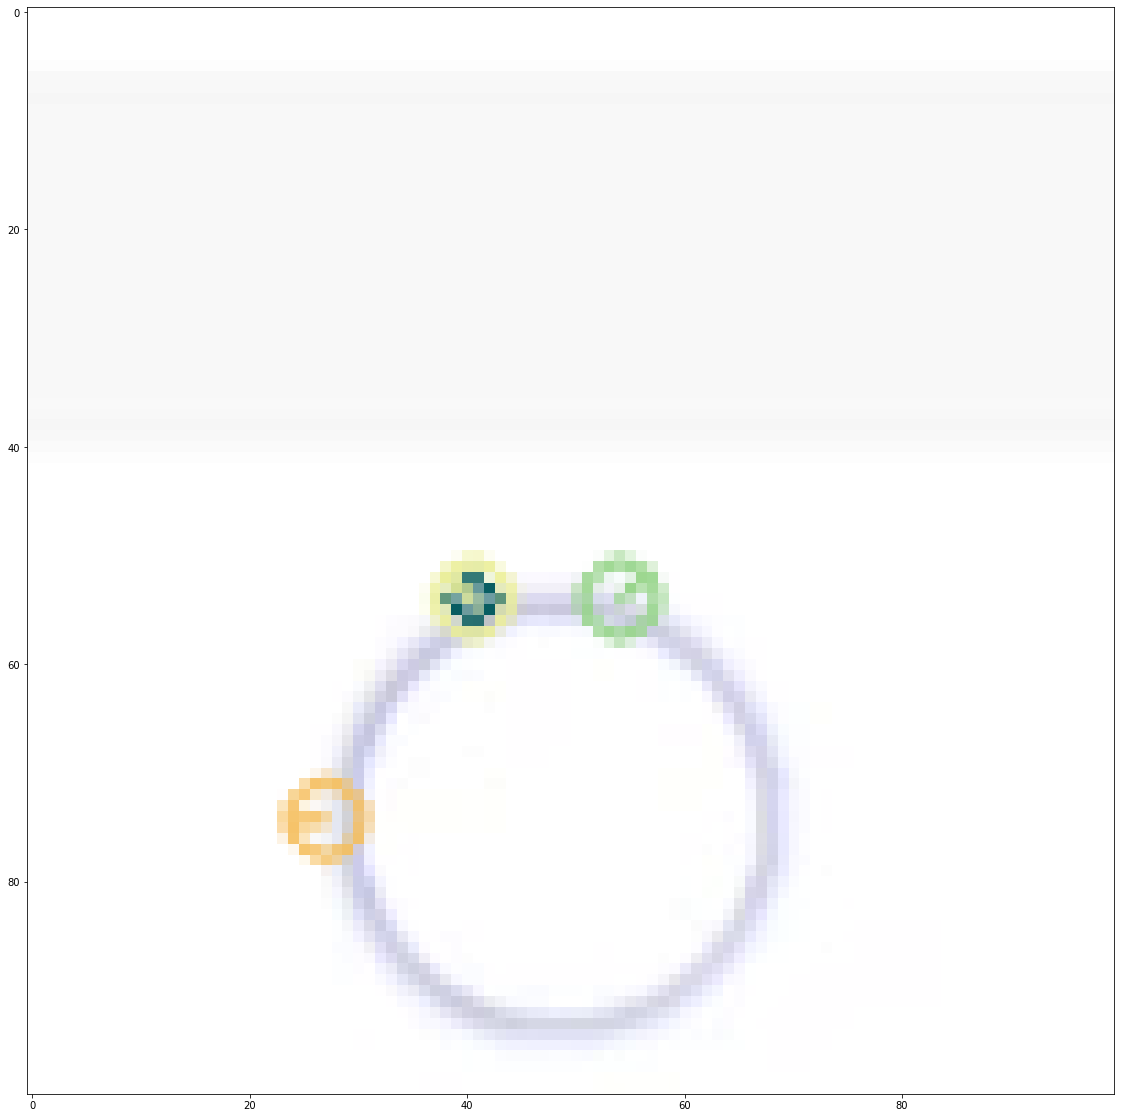

In [144]:
img_draw = cv2.drawKeypoints(prev_img, kp_prev, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)

In [150]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(desc_prev, desc_next)
matches = sorted(matches, key=lambda x: x.distance)
print(matches)


[<DMatch 0x7fcd786bb690>, <DMatch 0x7fcd786bb1b0>]


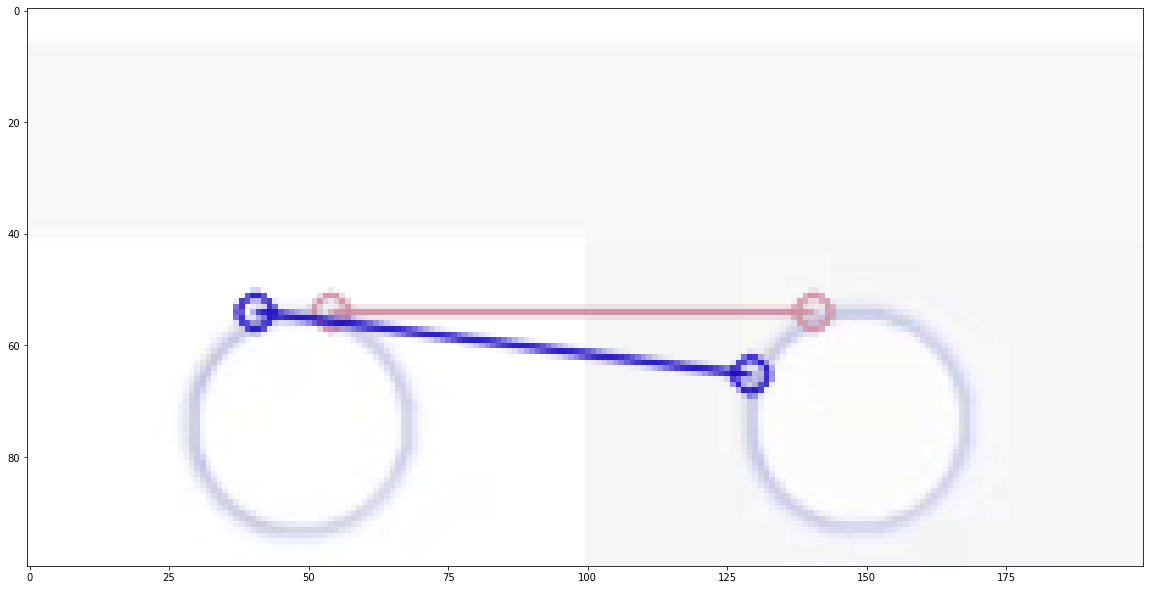

In [152]:
new_img = cv2.drawMatches(prev_img, kp_prev, next_img, kp_next, matches, None, flags=2)
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(new_img)

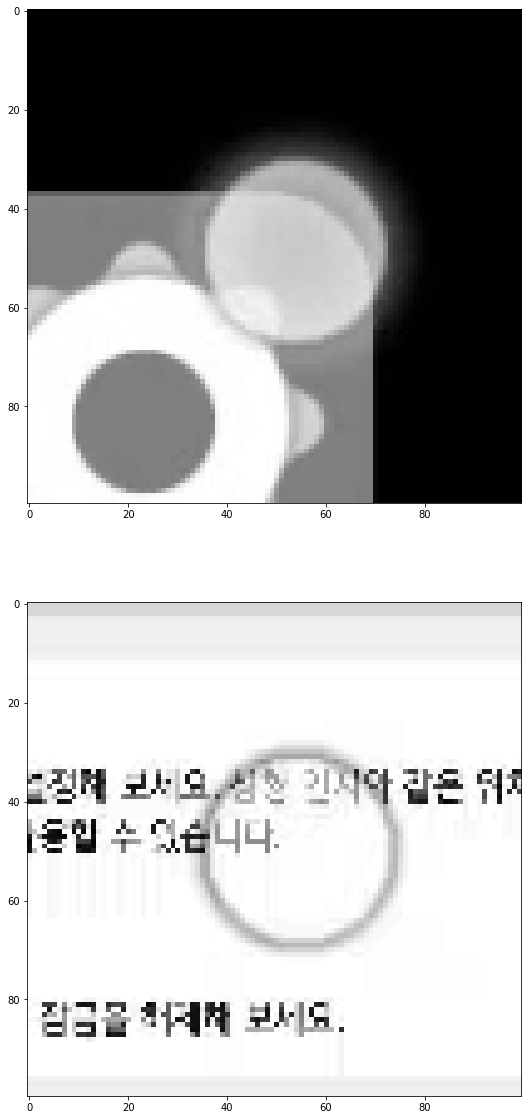

In [181]:
fig = plt.figure()
rows = 2
cols = 1

prev_img = images[50][880:980,420:520,:]
next_img = images[55][880:980,420:520,:]

prev_gray = cv2.cvtColor(prev_img, cv2.COLOR_RGB2GRAY)
next_gray = cv2.cvtColor(next_img, cv2.COLOR_RGB2GRAY)

show_images = [prev_gray, next_gray]
for i, image in enumerate(show_images):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(image, 'gray')

# print(images[206].shape)
# plt.imshow(images[206][500:600,500:600,:])


In [167]:

kp_prev, desc_prev = orb3.detectAndCompute(prev_gray, None)
kp_next, desc_next = orb3.detectAndCompute(next_gray, None)

print(desc_prev, '\n', desc_next)


[[ 34 202  44 ...   5  51  24]
 [ 34  74  44 ...  13  55  16]
 [162 202 104 ... 133  51  26]
 ...
 [ 34 202  44 ...   5  51  24]
 [162 202 104 ... 132  51  26]
 [ 34  74  44 ...  13  55  16]] 
 [[ 34 202 108 ... 132  51   8]
 [ 34  74  44 ...  13  51  16]
 [ 34 202 104 ...   5  51  24]
 ...
 [ 34 202  44 ...   5  51  24]
 [ 34  74  44 ... 133  55  16]
 [ 34  74  44 ...  13  55  16]]


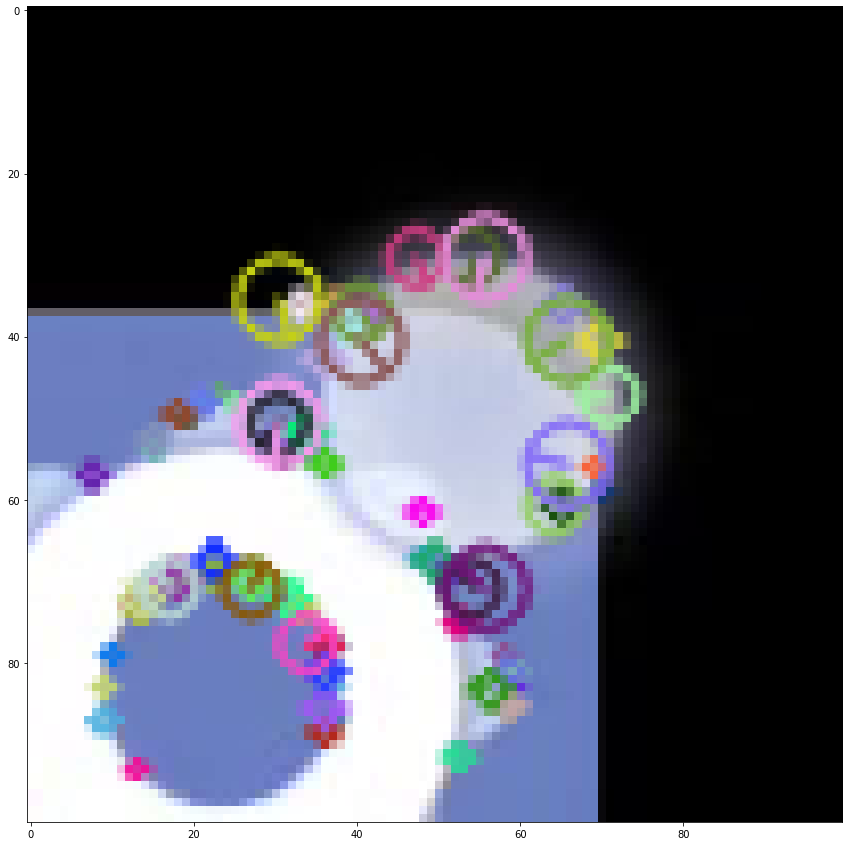

In [168]:
img_draw = cv2.drawKeypoints(prev_img, kp_prev, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)

In [169]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(desc_prev, desc_next)
matches = sorted(matches, key=lambda x: x.distance)
print(matches)


[<DMatch 0x7fcd786141f0>, <DMatch 0x7fcd7816bb10>, <DMatch 0x7fcd7816b9b0>, <DMatch 0x7fcd7816b7f0>, <DMatch 0x7fcd7816b930>, <DMatch 0x7fcd7816bc10>, <DMatch 0x7fcd7816be10>, <DMatch 0x7fcd7825c910>, <DMatch 0x7fcd7825ced0>, <DMatch 0x7fcd7825cc70>, <DMatch 0x7fcd7825cc50>, <DMatch 0x7fcd7825cb30>, <DMatch 0x7fcd7825ca90>, <DMatch 0x7fcd7825cdf0>, <DMatch 0x7fcd7825ccf0>, <DMatch 0x7fcd781124f0>, <DMatch 0x7fcd78112590>, <DMatch 0x7fcd781124b0>, <DMatch 0x7fcd78d77470>, <DMatch 0x7fcd7816bb30>, <DMatch 0x7fcd7825cef0>, <DMatch 0x7fcd7825cbf0>, <DMatch 0x7fcd7825cdd0>, <DMatch 0x7fcd781124d0>, <DMatch 0x7fcd7825ce10>]


In [178]:
print(desc_prev.shape, desc_next.shape)
bf = cv2.BFMatcher(cv2.NORM_HAMMING2)

matches = bf.knnMatch(desc_prev, desc_next, 2)
ratio = 0.75
matches = [first for first,second in matches \
                    if first.distance < second.distance * ratio]

(83, 32) (84, 32)


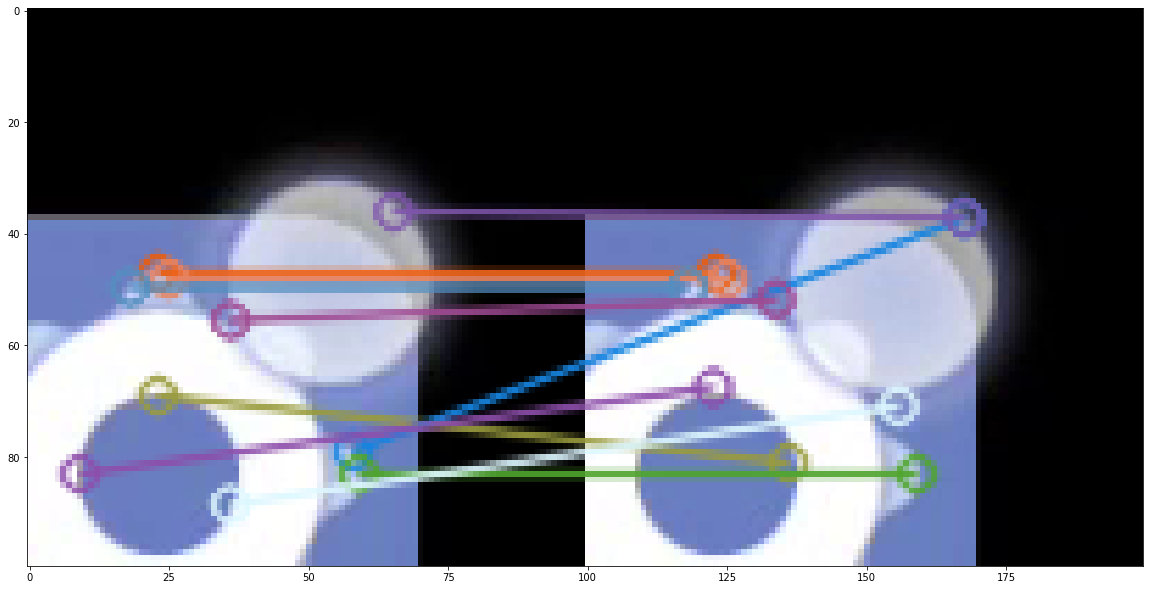

In [179]:
new_img = cv2.drawMatches(prev_img, kp_prev, next_img, kp_next, matches[:10], None, flags=2)
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(new_img)

#### 2) Try Optical flow which I can use it

In [200]:
file_path = "/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/"
file_name = None
for file in os.listdir(file_path):
    if file.startswith('test3'):
#     if file.startswith('9013'):
        print(file)
        file_name = file



test3.mp4


In [201]:
video_file = os.path.join(file_path, file_name)
print(video_file)

/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/test3.mp4


In [55]:
# setting for Video output
video_output_filename = 'output2.mp4'
video_output = file_path + video_output_filename
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_output, fourcc, 10.0, (720, 1640))

#### Optical Flow 로 확인 (Feature Detector 는 goodfeaturestotrack 으로 Spatial 한 정보만 가져옴 (테두리 정보))

In [56]:
cap = cv2.VideoCapture(video_file)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 추적 경로를 그리기 위함
color = np.random.randint(0, 255, (200, 3))
# 추적 선을 그리기 위함
lines = None
# 첫번째 frame 을 위함
first_frm = None
prevImage = None

# CalcOpticalFlowPyrLK 중지요건 설정 (??)
lk_params = dict(winSize = (15, 15),
                maxLevel = 5,
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))




while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret:
        image_draw = frame
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # if first frame comes, 
        if prevImage is None:
            print('First Frame')
            prevImage = image
            # 추적선을 그릴 이미지를 프레임 크기에 맞게 생성
            lines = np.zeros_like(frame)
            # 추적 시작을 위한 Feature (특징점) 검출
            prevPt = cv2.goodFeaturesToTrack(prevImage, 200, 0.01, 10)
            print(prevPt.shape)
            print(prevPt)
        else :
            nextImage = image
            # Optical Flow 로 next frame의 coner 찾기
            nextPt, status, err = cv2.calcOpticalFlowPyrLK(prevImage, nextImage, prevPt, None, **lk_params)
            
            # 대응점이 있는 코너 선별
            if prevPt is not None and nextPt is not None:
                prevMv = prevPt[status==1]
                nextMv = nextPt[status==1]
            else:
                continue
            
            for i, (p, n) in enumerate(zip(prevMv, nextMv)):
#                 if i == 0:
#                     print(p.shape, n.shape)
                px, py = p.ravel()
                nx, ny = n.ravel()
                
                # 이전 코너와 새로운 코너에 선그리기
                cv2.line(lines, (px, py), (nx, ny), color[i].tolist(), 2)
                # 새로운 코너에 점그리기
                cv2.circle(image_draw, (nx, ny), 2, color[i].tolist(), -1)
            
            # 누적된 추적선을 출력 이미지에 합성
#             print(image.shape, lines.shape)
#             image_draw = cv2.add(image_draw, lines)
            image_draw += lines
            # 다음 프레임을 위한 프레임과 코너점 이월
            prevImage = nextImage
            prevPt = nextMv.reshape(-1, 1, 2)
            
        out.write(image_draw)
        
    # if not vaild frame (EOF)
    else:
        break
        
cap.release()
out.release()


total frames : 246.0
First Frame
(200, 1, 2)
[[[ 517.  782.]]

 [[ 499.  786.]]

 [[ 101.  542.]]

 [[ 500.  524.]]

 [[ 485.  798.]]

 [[ 470.  798.]]

 [[ 610.  781.]]

 [[ 626.  542.]]

 [[ 666.  526.]]

 [[ 517.  798.]]

 [[ 124.  530.]]

 [[ 500.  542.]]

 [[  85.  542.]]

 [[  67.  537.]]

 [[ 654.  798.]]

 [[ 610.  798.]]

 [[ 525.  530.]]

 [[ 112.  533.]]

 [[  85.  530.]]

 [[ 487.  533.]]

 [[ 628.  787.]]

 [[ 515.  536.]]

 [[ 645.  533.]]

 [[ 618.  530.]]

 [[ 674.  790.]]

 [[ 632.  526.]]

 [[ 536.  529.]]

 [[ 527.  547.]]

 [[ 136.  542.]]

 [[ 600.  537.]]

 [[ 470.  534.]]

 [[ 470.  782.]]

 [[ 531.  795.]]

 [[ 646.  786.]]

 [[ 624.  798.]]

 [[ 679.  539.]]

 [[ 120.  542.]]

 [[  48.   46.]]

 [[ 485.  782.]]

 [[ 629.   31.]]

 [[ 662.  539.]]

 [[  55.   37.]]

 [[ 636.  541.]]

 [[ 499.  798.]]

 [[  73.   30.]]

 [[ 396. 1432.]]

 [[  63.   30.]]

 [[ 639.   33.]]

 [[ 148.   40.]]

 [[ 158.   43.]]

 [[ 184.   35.]]

 [[ 500.   38.]]

 [[ 511.   45.]]

 

#### Feature Detector 를 ORB 로 변경했을 때

In [210]:
# setting for Video output
video_output_filename = 'output_ORB2.mp4'
video_output = file_path + video_output_filename
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_output, fourcc, 10.0, (720, 1640))

In [211]:
orb2 = cv2.ORB_create(
    nfeatures=10000,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=5,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=5,
    fastThreshold=20,
)

def get_features(gray):
    kp, descs = orb2.detectAndCompute(gray, None)
    return np.array([np.array([k.pt]).astype(np.float32,) for k in kp])


In [212]:
cap = cv2.VideoCapture(video_file)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 추적 경로를 그리기 위함
color = np.random.randint(0, 255, (10000, 3))
# 추적 선을 그리기 위함
lines = None
# 첫번째 frame 을 위함
first_frm = None
prevImage = None

# CalcOpticalFlowPyrLK 중지요건 설정 (??)
lk_params = dict(winSize = (15, 15),
                maxLevel = 5,
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret:
        image_draw = frame
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # if first frame comes, 
        if prevImage is None:
            print('First Frame')
            prevImage = image
            # 추적선을 그릴 이미지를 프레임 크기에 맞게 생성
            lines = np.zeros_like(frame)
            # 추적 시작을 위한 Feature (특징점) 검출
            prevPt = get_features(prevImage)
            print(prevPt.shape)
            print(prevPt)
        else :
            nextImage = image
            # Optical Flow 로 next frame의 coner 찾기
            nextPt, status, err = cv2.calcOpticalFlowPyrLK(prevImage, nextImage, prevPt, None, **lk_params)
            
            # 대응점이 있는 코너 선별
            if prevPt is not None and nextPt is not None:
                prevMv = prevPt[status==1]
                nextMv = nextPt[status==1]
            else:
                continue
            
            for i, (p, n) in enumerate(zip(prevMv, nextMv)):
#                 if i == 0:
#                     print(p.shape, n.shape)
                px, py = p.ravel()
                nx, ny = n.ravel()
                
                # 이전 코너와 새로운 코너에 선그리기
                cv2.line(lines, (px, py), (nx, ny), color[i].tolist(), 2)
                # 새로운 코너에 점그리기
                cv2.circle(image_draw, (nx, ny), 2, color[i].tolist(), -1)
            
            # 누적된 추적선을 출력 이미지에 합성
#             print(image.shape, lines.shape)
#             image_draw = cv2.add(image_draw, lines)
            image_draw += lines
            # 다음 프레임을 위한 프레임과 코너점 이월
            prevImage = nextImage
            prevPt = nextMv.reshape(-1, 1, 2)
            
        out.write(image_draw)
        
    # if not vaild frame (EOF)
    else:
        break
        
cap.release()
out.release()


total frames : 197.0
First Frame
(8984, 1, 2)
[[[ 134.        27.     ]]

 [[  96.        27.     ]]

 [[ 136.        27.     ]]

 ...

 [[ 153.77344 1255.8164 ]]

 [[ 179.40234 1358.332  ]]

 [[ 230.66016  461.3203 ]]]


# 마지막으로, 일정한 모양을 그린 이미지를 ORB로 Keypoint Search 를 했을 때 과연 가능할 것인지.

In [38]:
import os
import cv2
import matplotlib.pyplot as plt

file_path = '/home001/yousung.choi/projects/project_coordination/tools/optical_flow_test/images/'

for files in os.listdir(file_path):
    if files.startswith('figures'):
        file_name = files

print(file_path + file_name)

/home001/yousung.choi/projects/project_coordination/tools/optical_flow_test/images/figures.jpg


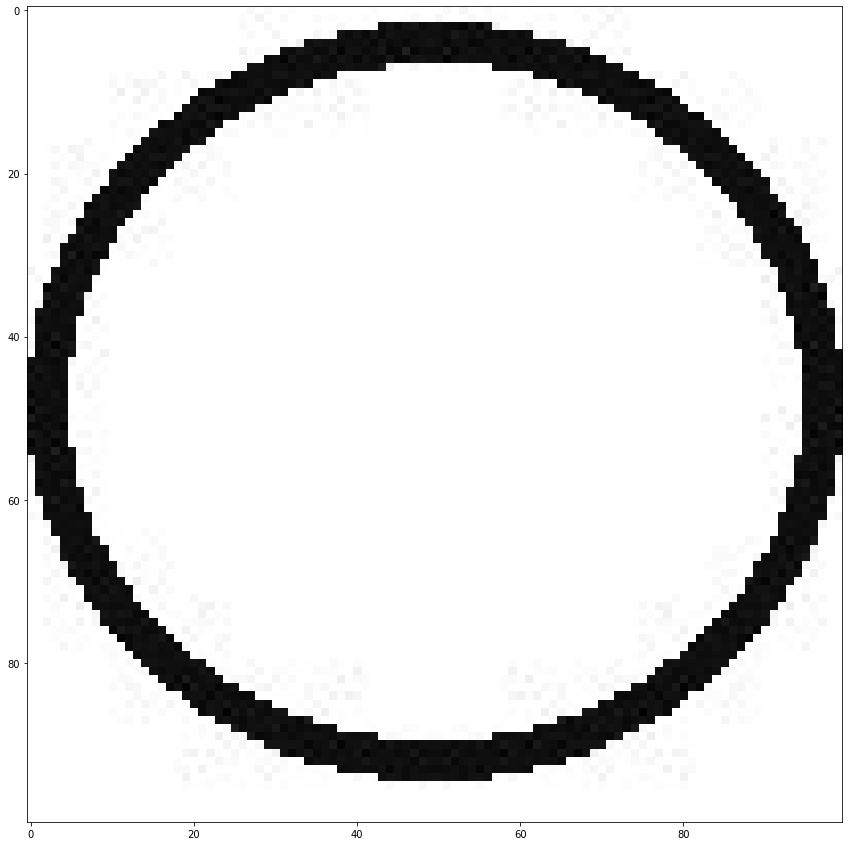

In [43]:
target_img = cv2.imread(file_path + file_name, cv2.IMREAD_GRAYSCALE)
target_img.shape
plt.imshow(target_img[40:140,30:130], 'gray')

In [16]:
orb3 = cv2.ORB_create(
    nfeatures=100,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=5,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=2,
    fastThreshold=20,
)

5


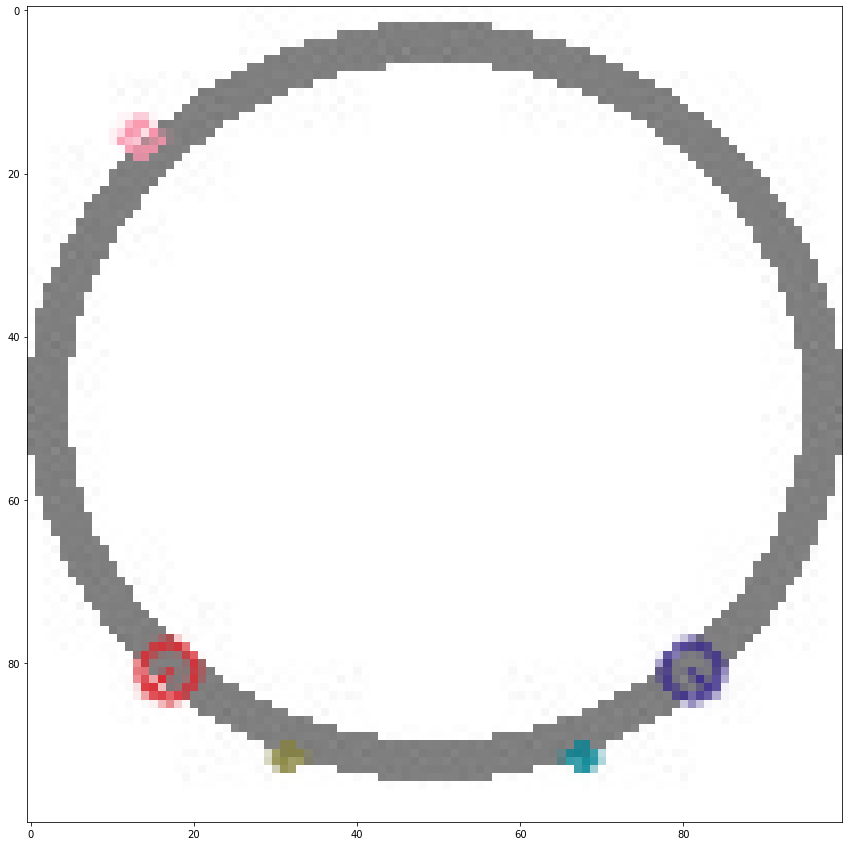

In [44]:

kp, desc = orb3.detectAndCompute(target_img[40:140,30:130], None)

print(len(desc))
img_draw = cv2.drawKeypoints(target_img[40:140,30:130], kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)

orb1 = cv2.ORB_create(
    nfeatures=100,
)

kp, desc = orb1.detectAndCompute(target_img, None)

print(len(desc))
img_draw = cv2.drawKeypoints(target_img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)

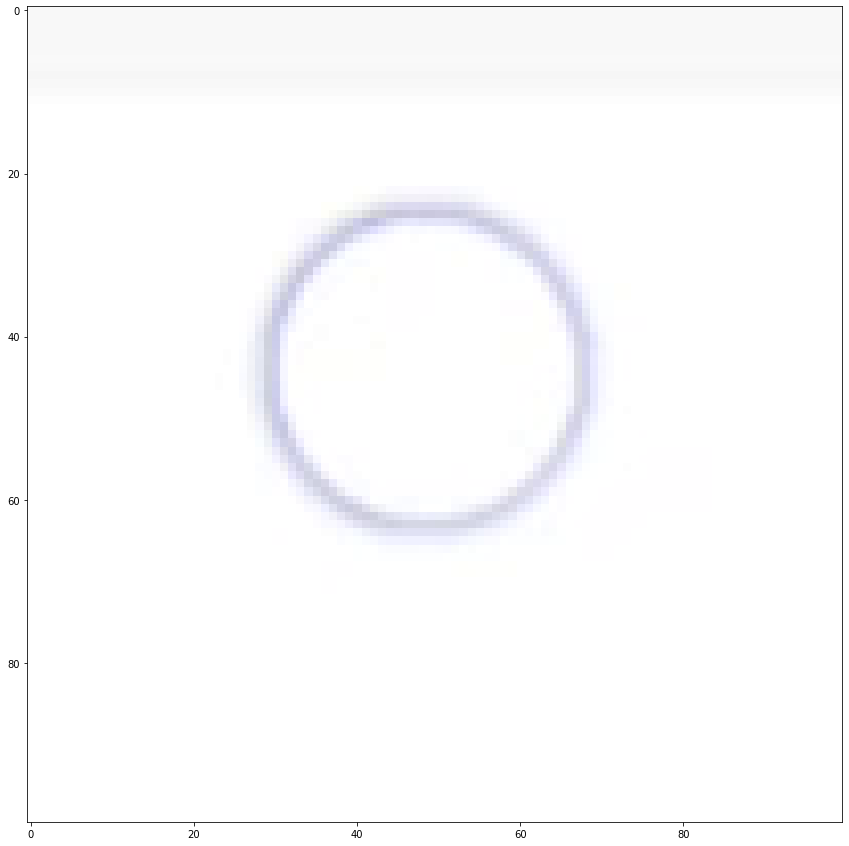

In [30]:
plt.imshow(images[206][530:630,500:600,:])

6


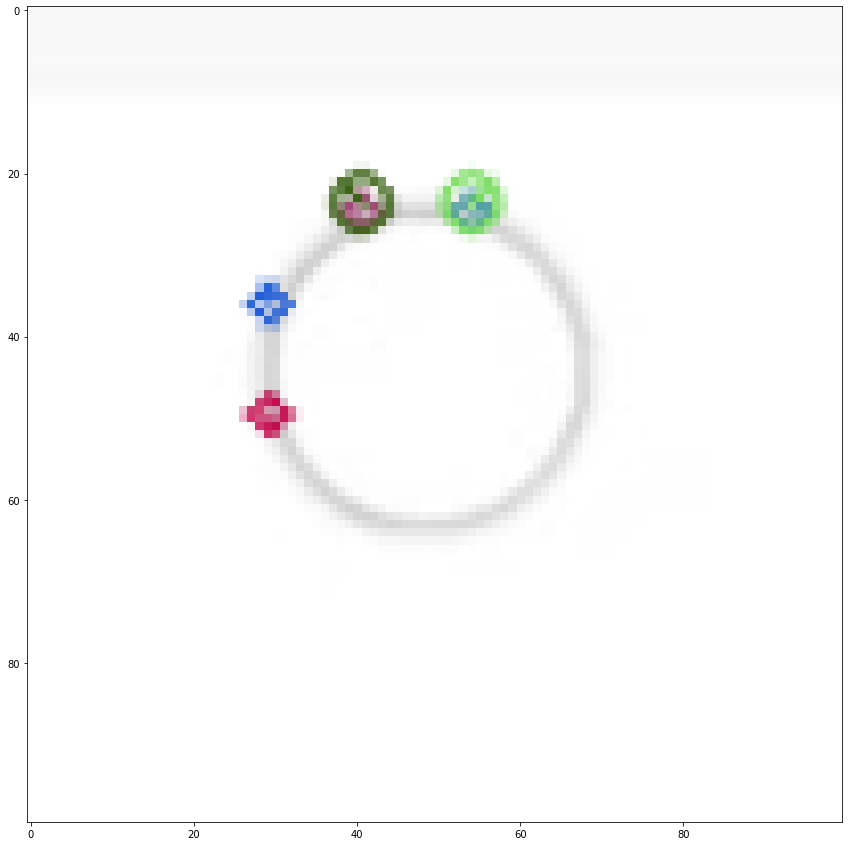

In [45]:
target_img = cv2.cvtColor(images[206][530:630,500:600,:], cv2.COLOR_BGR2GRAY)
plt.imshow(target_img, 'gray')
orb1 = cv2.ORB_create(
    nfeatures=100,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=5,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=2,
    fastThreshold=20,
)

kp, desc = orb1.detectAndCompute(target_img, None)

print(len(desc))
img_draw = cv2.drawKeypoints(target_img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
